# Práctica 1



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.ticker import AutoMinorLocator

### Introducimos los datos

In [2]:
P = 581.3   #mmHg
T = 10   #ºC
waterP = 2.775   #mmHg
ondaref = 0.45   #micras

# Definimos las variables
lambdas = [0.35,0.50,0.92]   #micras
colors = ['blue','lime','tab:red']

cenit = np.linspace(0,80,6)   #deg

### Refracción atmosférica

Vamos a calcular la cte de refracción.

Calulamos la $n(\lambda )$ según Filippenko

In [3]:
def refindex(londa,P,T,wP=False):
    '''Calcula el índice de refracción para el lugar en el que situemos el telescopio.
    
    Parameters
    ----------
    londa: Longitud de onda (microns)
    P:     Presión (mm Hg)
    T:     Temperatura (ºC)
    wP:    Presión del vapor de agua relativa a la humedad (mm Hg)
    
    '''
    n_sealev = 1+(64.328+(29498.1/(146-(1/londa)**2))+255.4/(41-(1/londa)**2))*1e-6   #P=760 y T=15
    n_ambient = 1+(n_sealev-1)*(P*(1+(1.049-0.0157*T)*1e-6*P)/(720.883*(1+0.003661*T)))   #Corrección P-T
    
    # Si no se requiere corrección por humedad
    if wP == False:
        return n_ambient
    else:
        hum = wP*((0.0624-0.000680/(londa**2))/(1+0.003661*T))
        n_hum = n_ambient-hum*1e-6
        return n_hum  
    

Calculamos la diferencia $\Delta r $ para distintas altitudes

In [4]:
delta_r = np.empty([len(lambdas),len(cenit)])

In [5]:
n_ref = refindex(ondaref,P,T,waterP)

for i in range(len(lambdas)):
    delta_r[i] = 206265*(refindex(lambdas[i],P,T,waterP)-n_ref)*np.tan(np.deg2rad(cenit))
    

### Seeing

Para $\lambda = 550 \ nm$ se da un $r_0 = 15 \ cm$

In [6]:
def pFried(londa,z,londa0=0.550,r0=15):
    '''Calcula la longitud de coherencia r0 en cm.
    Parameters
    ----------
    londa:   longitud de onda (microns)
    z:       distancia cenital (deg)  
    londa0:  longitud de onda de referencia (microns). Default = 550nm
    r0:      longitud de coherencia de referencia (cm). Default = 15cm
    '''
    return r0*(londa/londa0)**1.2*(np.cos(np.deg2rad(z)))**0.6  #devuelve el r0 para londa


def seeing(londa,z):
    '''Calcula el tamaño angular del disco de seeing en arcsec
    Parameters
    ----------
    londa: longitud de onda (microns)
    z: distancia cenital (deg)  
    '''
    
    return 1.2*206265*londa/(pFried(londa,z)*1e4)
    
    

### Gráfica

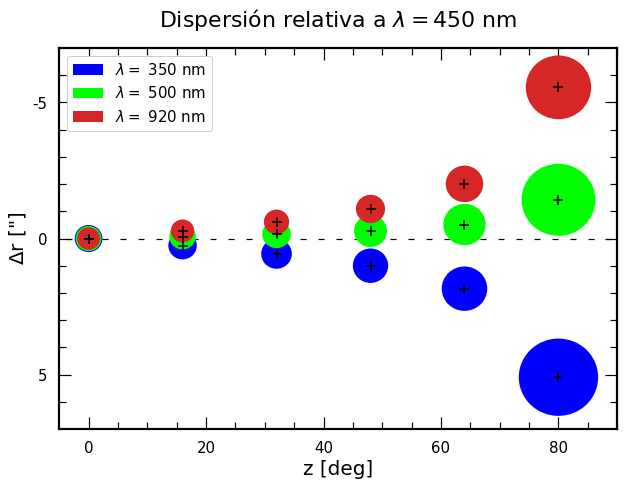

In [7]:
fig,ax = plt.subplots(figsize=(10,7))

#Parámetros del gráfico
ax.set_ylim([-6.99,6.99])
ax.set_xlim([-5,90])
ax.invert_yaxis()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


ax.tick_params(bottom=True,top=True,left=True,right=True)
ax.tick_params(which='minor',bottom=True,top=True,left=True,right=True)

ax.spines[['bottom','left','top','right']].set_linewidth(2.2)

ax.tick_params(axis='both',which='both',direction='in',width=1.2)
ax.tick_params(axis='both',which='major',labelsize=15,length=12,pad=12)
ax.tick_params(axis='both',which='minor',length=7)

#labels ejes
R_ax = [-5,0,5]
ax.set_yticks(np.arange(-5,6,5))
ax.set_yticklabels(np.round(R_ax,0))

#titulos
ax.set_title('Dispersión relativa a $\lambda =450$ nm',y=1.04,fontsize=22)
ax.set_xlabel('z [deg]',fontsize=20)
ax.set_ylabel(r'$\Delta $r ["]',fontsize=20)

#horizontal
ax.hlines(y=0,xmin=-10,xmax=100,linestyle=(0,[5,10]),color='k',linewidth=1.2,zorder=0)

#grafica
for i in range(len(lambdas)):  
    ax.scatter(cenit,delta_r[i],marker='+',s=90,color='k',zorder=4)  #refracción
    for j in range(len(cenit)):
        if j==0:   #label de la leyenda (uno solo por color)
            circ = patches.Ellipse((cenit[j],delta_r[i,j]),width=7/10*95/(2*6.99)*seeing(lambdas[i],cenit[j]),height=seeing(lambdas[i],cenit[j]),facecolor=colors[i],zorder=2,label='$\lambda =$ '+str(int(lambdas[i]*1e3))+' nm')
        else:
            circ = patches.Ellipse((cenit[j],delta_r[i,j]),width=7/10*95/(2*6.99)*seeing(lambdas[i],cenit[j]),height=seeing(lambdas[i],cenit[j]),facecolor=colors[i],zorder=2)
        ax.add_patch(circ)     #seeing
    
    
    
ax.legend(fontsize=15,framealpha=1)
plt.show()       

### Tablas

In [8]:
import pandas as pd

In [9]:
dispersion = pd.DataFrame({'z':cenit, '350 nm':delta_r[0], '500 nm':delta_r[1],'920 nm':delta_r[2]})
disco_seeing = pd.DataFrame({'z':cenit, '350 nm':seeing(lambdas[0],cenit), '500 nm':seeing(lambdas[1],cenit), '920 nm':seeing(lambdas[2],cenit)})

In [10]:
dispersion

,z,350 nm,500 nm,920 nm
0,0.0,0.000000,-0.000000,-0.000000
1,16.0,0.257591,-0.071974,-0.280879
2,32.0,0.561337,-0.156843,-0.612086
3,48.0,0.997693,-0.278766,-1.087892
4,64.0,1.841843,-0.514630,-2.008359
5,80.0,5.094665,-1.423501,-5.555261


In [11]:
disco_seeing

,z,350 nm,500 nm,920 nm
0,0.0,0.993430,0.925032,0.818829
1,16.0,1.017260,0.947222,0.838471
2,32.0,1.096692,1.021185,0.903943
3,48.0,1.264243,1.177200,1.042045
4,64.0,1.629416,1.517231,1.343037
5,80.0,2.840109,2.644567,2.340944
